# Part II - ( Ford GoBike exploratory phase)
## by (Khalil Bezrati)




## Investigation Overview




for the investigation, the overall goal is to look in the trips for  the Ford GoBike bikes usage in 2019, and show insights concluded from this data based on  weekday distribution of rides, user_age , duration_sec, average_duration_sec.





## Dataset Overview


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area the data of the ford gobike contains approximately 175000 observation and 9 columns : 

"duration_sec",
"start_time",
"end_time",
"start_station_name",
"end_station_name",
"user_type",
"member_gender",
"age",	
"duration_hour",
"day",
"hour"



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("data_set_cleaned")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,age,duration_hour,day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,35,14.50,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,47,17.18,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,30,10.14,Thursday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,45,0.44,Thursday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,60,0.50,Thursday,23



### Which weekday has the most traffic ?

When we look at this graph, we can see that Thursday is the day with the most traffic in the week, and that Saturday and Sunday are the days with the least traffic. does it mean that rides in Thurday last longer ?

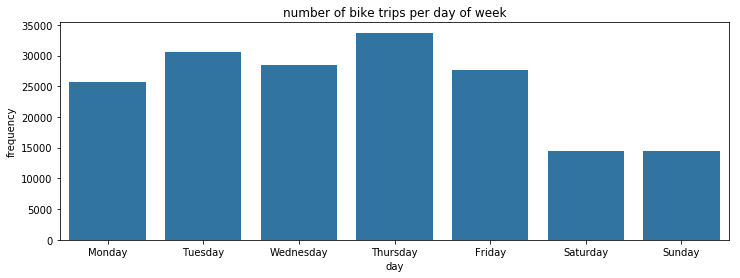

In [4]:
plt.figure(figsize = [12,4])
color = sb.color_palette()[0]
sb.countplot(data = df, x = "day", color = color , order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) 
plt.title("number of bike trips per day of week")
plt.ylabel("frequency");



### Average duration per weekday

We can see that despite Thursday is the day with most traffic, rides in the weekends last longer on average.

Saturday and Sunday average duration are above 850 second, while Thursday the day with most traffic , average duration is below 700 second.

Text(0.5,1,'Average duration per day of week')

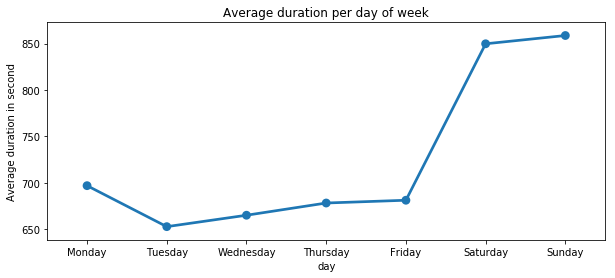

In [5]:
average_sec_per_day = df.groupby("day").duration_sec.mean()

plt.figure(figsize = [10,4])
sb.pointplot(data = df, x= average_sec_per_day.index, y = average_sec_per_day , order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.ylabel("Average duration in second")
plt.title("Average duration per day of week")



### what is the frequency of each user type?

In order to see the relationship of user_type with the duration i want to show the user_type distribution which is quite captivating, from this graph we can see that Subscribers percentage is around 90% and Customers is only around 10%.



In [6]:
n_user_type = df["user_type"].value_counts().sum()
max_count = df["user_type"].value_counts()[0]
max_prop = max_count / n_user_type

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
plt.figure(figsize=[7,4])

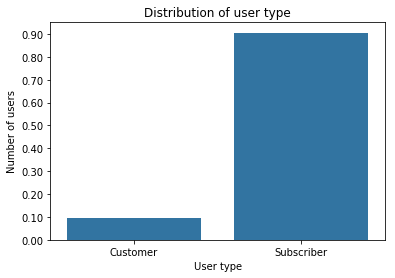

In [7]:
sb.countplot(data=df, x='user_type', color = base_color)
plt.title('Distribution of user type')
plt.xlabel('User type')
plt.ylabel('Number of users')
plt.yticks(tick_props*n_user_type, tick_names);

 ### User_type average duration per weekday, is there a difference between Subscribers and Customers ?
 
 the chart shows us that even though we have much more Subscriber in our data . Customers tend to spend more time on average riding .

Customers spend less time between monday and friday between 750 and 800 second while in the weekend the average duration increases , for Saturday and Sunday the average time is above 900 second.

Subscribers are different they spend time riding between 500 and 550 second for all the days of the week .

This shows us that despite Subscribers are much more less than Customers . Subscribers tend to spend a steady average time for all the day of the week not like Customers.

In [8]:
df1 = df[(df["duration_sec"] < 2000) & (df["age"] <80)]

duration_per_day_usertype = df1.groupby(["day", "user_type"]).duration_sec.mean()
duration_per_day_usertype = duration_per_day_usertype.reset_index()

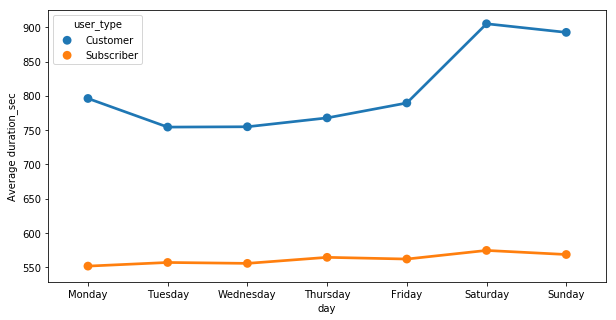

In [9]:
plt.figure(figsize=[10,5])
sb.pointplot(data = duration_per_day_usertype ,x = 'day', y='duration_sec', hue='user_type', order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.ylabel('Average duration_sec');

In [ ]:
!jupyter nbconvert Your_Slide_Deck_Name.ipynb --to slides --post serve --no-input --no-prompt

In [14]:
jupyter nbconvert Your_Slide_Deck_Name.ipynb --to slides --template output-toggle.tpl
--post serve

SyntaxError: invalid syntax (<ipython-input-14-39caa73886ef>, line 1)